In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Bankchurners.csv')
df = df.rename(columns={
    'Dependent_count': 'Dependent_Count',
    'Months_on_book': 'Months_on_Book',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Classifier_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Classifier_2'
})
df = df.drop(['CLIENTNUM'], axis=1)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_Count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_Book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Naive_Bayes_Classifier_1    0
Naive_Bayes_Classifier_2    0
dtype: int64

In [26]:
df.describe(include='all')

,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
count,10127.000000,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,NaN,2,NaN,7,4,6,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.160660,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,...,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,0.367235,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,...,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,0.000000,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,...,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,0.000000,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,...,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,0.000000,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,...,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,0.000000,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,...,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900


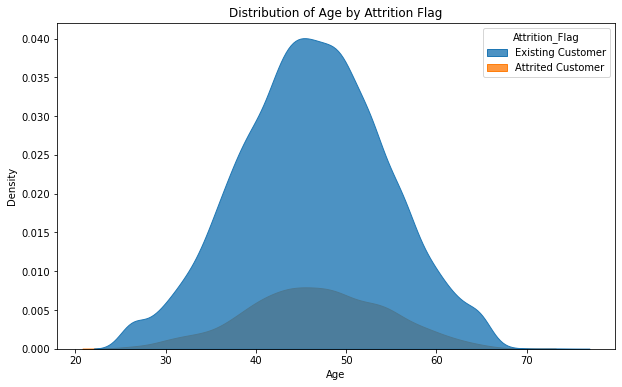

In [7]:
# Plot distribution of age by attrition flag
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Customer_Age', hue='Attrition_Flag', shade=True, alpha=0.8)
plt.title('Distribution of Age by Attrition Flag')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

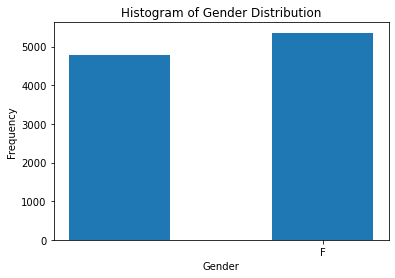

In [8]:
# create a histogram of the housingMedianAge column
plt.hist(df['Gender'], histtype='bar', align='right', orientation='vertical', bins=3, )

# set the axis labels and title
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Histogram of Gender Distribution')

# show the plot
plt.show()

In [12]:
cc_data = df.copy()

columns_to_encode = ['Gender', 'Marital_Status','Education_Level', 'Income_Category', 'Card_Category']

# instantiate OneHotEncoder
onehot = OneHotEncoder()

# create a copy of the original data
cc_data_encoded = cc_data.copy()

# encode each column and add to the encoded data
for col in columns_to_encode:
    col_encoded = onehot.fit_transform(cc_data[[col]]).toarray()
    col_encoded_df = pd.DataFrame(col_encoded, columns=[col + '_' + category for category in onehot.categories_[0]])
    cc_data_encoded.drop(col, axis=1, inplace=True)
    cc_data_encoded = pd.concat([cc_data_encoded, col_encoded_df], axis=1)

# edu_categories = ['Unknown','Uneducated','High School', 'College','Graduate','Post-Graduate','Doctorate']
# inc_categories = ['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +',]
# card_categories = ['Blue', 'Silver', 'Gold',  'Platinum']
# attrition_categories = ['Existing Customer', 'Attrited Customer']

# encoder = OrdinalEncoder(categories=[edu_categories, inc_categories, card_categories, attrition_categories])

# encoded_features = encoder.fit_transform(cc_data[['Education_Level', 'Income_Category', 'Card_Category', 'Attrition_Flag']])
# encoded_columns = pd.DataFrame(encoded_features, columns=['Education_Level', 'Income_Category', 'Card_Category', 'Attrition_Flag'])

# # drop the original columns from the original dataframe
# cc_data_encoded.drop(['Education_Level', 'Income_Category', 'Card_Category', 'Attrition_Flag'], axis=1, inplace=True)

# cc_data_encoded = pd.concat([cc_data_encoded, encoded_columns], axis=1)

cc_data_encoded

,Attrition_Flag,Customer_Age,Dependent_Count,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
df['Attrition_Flag']=df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1})
X = cc_data_encoded.drop('Attrition_Flag', axis=1)
y = cc_data_encoded['Attrition_Flag']

In [14]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_train

,Customer_Age,Dependent_Count,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-1.168529,0.508871,-1.255449,-0.528423,0.659357,1.400926,-0.199368,1.498657,-0.333561,-1.676223,...,-0.276971,-0.464073,-0.396992,-0.420038,1.353441,-0.355682,0.276084,-0.114042,-0.039425,-0.244558
1,1.193859,1.279242,-0.000531,0.760006,0.659357,-0.408928,-0.724170,0.649777,-0.782527,-0.905844,...,-0.276971,-0.464073,-0.396992,2.380740,-0.738858,-0.355682,0.276084,-0.114042,-0.039425,-0.244558
2,0.323506,-1.031871,-0.000531,-1.172638,-0.337342,0.495999,-0.269737,1.268369,-0.383336,0.339679,...,-0.276971,-0.464073,2.518944,-0.420038,-0.738858,-0.355682,-3.622088,8.768701,-0.039425,-0.244558
3,-0.422512,-0.261500,-0.627990,1.404220,-0.337342,1.400926,2.831284,1.509681,2.696939,0.731788,...,3.610491,-0.464073,-0.396992,-0.420038,-0.738858,-0.355682,-3.622088,-0.114042,-0.039425,4.089010
4,0.447842,-0.261500,-0.000531,-0.528423,-0.337342,0.495999,-0.346133,-0.055786,-0.341235,-1.459410,...,-0.276971,2.154835,-0.396992,-0.420038,-0.738858,-0.355682,0.276084,-0.114042,-0.039425,-0.244558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,-0.919856,-1.031871,-1.506432,0.115791,0.659357,0.495999,-0.698741,0.172052,-0.714333,-1.076527,...,-0.276971,-0.464073,-0.396992,-0.420038,1.353441,-0.355682,0.276084,-0.114042,-0.039425,-0.244558
7084,-0.298175,-0.261500,-0.126023,0.115791,0.659357,-0.408928,2.625989,-1.427713,2.754498,2.498586,...,-0.276971,-0.464073,-0.396992,-0.420038,-0.738858,2.811498,-3.622088,-0.114042,-0.039425,4.089010
7085,-0.049503,2.049613,-0.000531,0.760006,0.659357,-2.218781,-0.561512,-1.427713,-0.433879,-0.024752,...,-0.276971,-0.464073,-0.396992,-0.420038,-0.738858,2.811498,0.276084,-0.114042,-0.039425,-0.244558
7086,-0.298175,-0.261500,-0.000531,0.760006,3.649452,-1.313854,-0.299769,-0.059460,-0.294530,-0.868939,...,-0.276971,-0.464073,2.518944,-0.420038,-0.738858,-0.355682,0.276084,-0.114042,-0.039425,-0.244558


In [36]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

def preprocess_inputs(df):
    df=df.copy()
    #dropping the last two column (Naive Bayes Classifiers)
    df=df.drop(df.columns[-2:],axis=1)
    #filling unknown to mode the education columns
    df['Education_Level']=df['Education_Level'].replace({'Unknown':df['Education_Level'].mode()[0]})
    df['Income_Category']=df['Income_Category'].replace({'Unknown':df['Income_Category'].mode()[0]})
    
    education_encoding={'High School':1,
      'Graduate':3,
      'Uneducated':0,
      'College':2,
      'Post-Graduate':4,
      'Doctorate':5}
    df['Education_Level']=df['Education_Level'].replace(education_encoding)
    
    df['Gender']=df['Gender'].apply(lambda x:0 if x=='M' else 1)
    
    df=onehot_encode(df,'Marital_Status')
    
    df=onehot_encode(df,'Card_Category')
    
    df['Attrition_Flag']=df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1})
    
    income_encoding={'$60K - $80K':2,
  'Less than $40K':0,
  '$80K - $120K':3,
  '$40K - $60K':1,
  '$120K +':4}
    df['Income_Category']=df['Income_Category'].replace(income_encoding)
    
    
    y=df['Attrition_Flag']
    x=df.drop('Attrition_Flag',axis=1)
    
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

{column:len(df[column].unique()) for column in df.columns if df[column].dtypes=='object'}

(7088, 25)
(3039, 25)
(7088,)
(3039,)


{'Gender': 2,
 'Education_Level': 7,
 'Marital_Status': 4,
 'Income_Category': 6,
 'Card_Category': 4}

In [16]:
models={
    'Logistic Regression':LogisticRegression(),
    #Random Forest Regressor
    'Random Forest': RandomForestClassifier(),
    #Decision Tree Regressor
    'Decision Tree': DecisionTreeClassifier(),
    #Neural Network
    'MLP Classifier': MLPClassifier(),
    'Support Vector': SVC()
}

In [17]:
for name, model in models.items():
    model.fit(X_train,y_train)
    print(name)
    print(model.score(X_test,y_test))

Logistic Regression
0.8338269167489306
Random Forest
0.8338269167489306
Decision Tree
0.7203027311615663


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier
0.8117801908522541
Support Vector
0.8338269167489306
